<a href="https://colab.research.google.com/github/arpit1532000/retailstoreEDA/blob/main/RetailstoreEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [17]:
df= pd.read_csv("/content/Online Retail.csv")

In [ ]:
df.head()

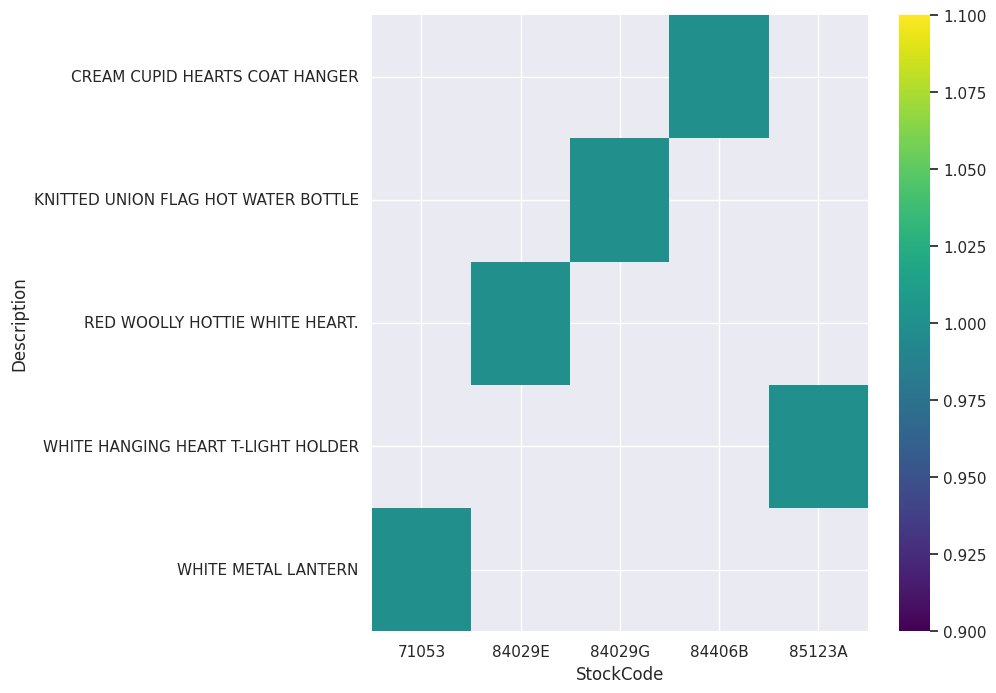

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Description'].value_counts()
    for x_label, grp in _df_11.groupby('StockCode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StockCode')
_ = plt.ylabel('Description')

In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
columns_to_drop = ['Description']
df_dropped = df.drop(columns=columns_to_drop, inplace=False)

In [18]:
print(df_dropped)

       InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice  CustomerID  \
0         536365    85123A         6   12/1/2010 8:26       2.55     17850.0   
1         536365     71053         6   12/1/2010 8:26       3.39     17850.0   
2         536365    84406B         8   12/1/2010 8:26       2.75     17850.0   
3         536365    84029G         6   12/1/2010 8:26       3.39     17850.0   
4         536365    84029E         6   12/1/2010 8:26       3.39     17850.0   
...          ...       ...       ...              ...        ...         ...   
541904    581587     22613        12  12/9/2011 12:50       0.85     12680.0   
541905    581587     22899         6  12/9/2011 12:50       2.10     12680.0   
541906    581587     23254         4  12/9/2011 12:50       4.15     12680.0   
541907    581587     23255         4  12/9/2011 12:50       4.15     12680.0   
541908    581587     22138         3  12/9/2011 12:50       4.95     12680.0   

               Country  
0       United

In [22]:
df_dropped.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


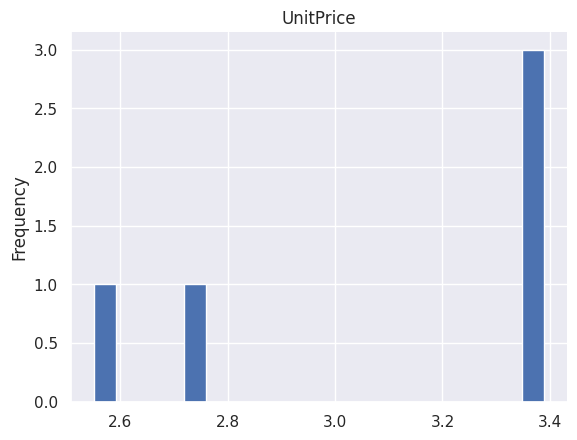

In [20]:
from matplotlib import pyplot as plt
_df_17['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

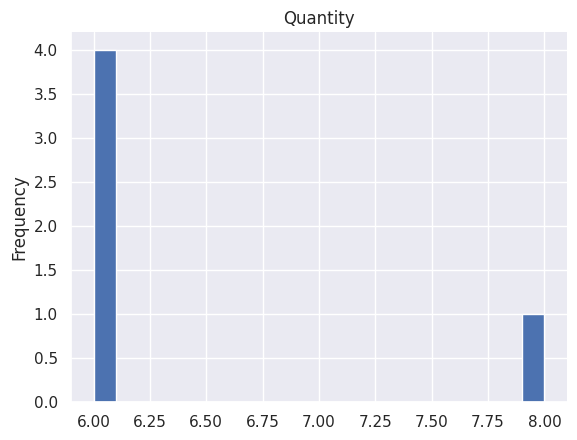

In [23]:
from matplotlib import pyplot as plt
_df_16['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='UnitPrice'>

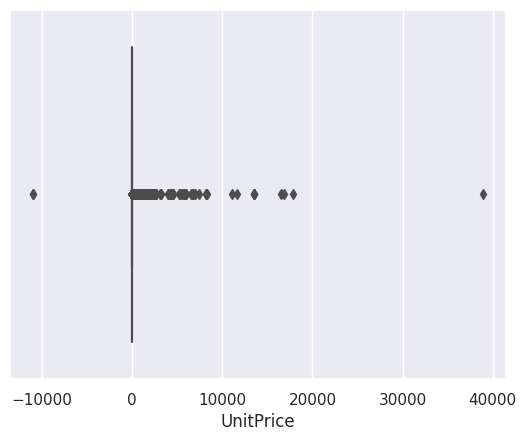

In [24]:
sns.boxplot(x=df['UnitPrice'])

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity         9.00
UnitPrice        2.88
CustomerID    2838.00
dtype: float64


<ipython-input-20-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-20-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


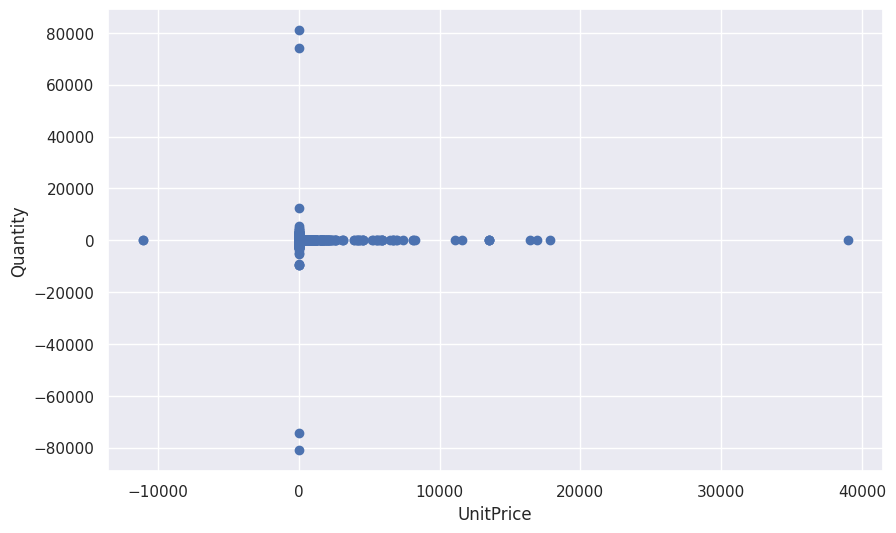

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['UnitPrice'], df['Quantity'])
ax.set_xlabel('UnitPrice')
ax.set_ylabel('Quantity')
plt.show()

In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-21-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(444108, 8)